In [2]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogFormatterExponent
from numpy import unravel_index
import astropy.units as unit
import pysynphot
import os
import math
from sh import gunzip
from matplotlib.patches import Circle

In [3]:
main_dir='/Users/polaris/Onedrive-UA/OneDrive - University of Arizona/Debris-Disk-Modelling/Debris-Disk-Modelling/Eps-eri-Roman_pol/Simulations_paper/Revision/HLC_band/'
dust='Astrosil/'
file_dir=main_dir+dust

In [4]:
figure_dir='/Users/polaris/Onedrive-UA/OneDrive - University of Arizona/Debris-Disk-Modelling/Debris-Disk-Modelling/Eps-eri-Roman_pol/Simulations_paper/Revision/Figures/'

In [5]:
px=py=256
psf_scale=0.02182 ##arcsecs/pixel
xpix=(np.arange ((-px/2)+96, (px/2)-96, 1))*psf_scale
ypix=(np.arange ((-px/2)+96, (px/2)-96, 1))*psf_scale
sq_as_per_pix=psf_scale**2

sst=fits.getdata(file_dir+'sst_band.fits')
Q=fits.getdata(file_dir+'Q_band.fits')
U=fits.getdata(file_dir+'U_band.fits')
nx=128-32
ny=128+32

In [6]:
X, Y = np.mgrid[(0):(px):256j, (0):(px):256j]
positions = np.vstack([X.ravel(), Y.ravel()])
pos=np.transpose(positions)

Phi=np.arctan2((pos[:,0]-px/2),(pos[:,1]-px/2))
Phi_new=np.reshape(Phi,(px,px))

Q_phi=-(Q*np.cos(2*Phi_new)+U*np.sin(2*Phi_new))
U_phi=-Q*np.sin(2*Phi_new)+U*np.cos(2*Phi_new)
theta=0.5*np.arctan2(U,Q)
p_1=Q_phi/sst
p_1[np.isnan(p_1)]=0
np.max(p_1)

/var/folders/tz/b2jsht6d7nv7db1v7bt3645c0000gn/T/ipykernel_20266/398992299.py:11: RuntimeWarning: invalid value encountered in true_divide
  p_1=Q_phi/sst


0.4266857883338245

In [7]:
#After convolution
I0=fits.getdata(file_dir+'disk_0.fits')
I90=fits.getdata(file_dir+'disk_90.fits')
I45=fits.getdata(file_dir+'disk_45.fits')
I135=fits.getdata(file_dir+'disk_135.fits')

Q=I0-I90
U=I45-I135
I=I0+I90

px=py=64

X, Y = np.mgrid[(0):(px):64j, (0):(px):64j]
positions = np.vstack([X.ravel(), Y.ravel()])
pos=np.transpose(positions)

Phi=np.arctan2((pos[:,0]-px/2),(pos[:,1]-px/2))
Phi_new=np.reshape(Phi,(px,px))

Q_phi=-(Q*np.cos(2*Phi_new)+U*np.sin(2*Phi_new))
U_phi=-Q*np.sin(2*Phi_new)+U*np.cos(2*Phi_new)
theta=0.5*np.arctan2(U,Q)
p_2=Q_phi/I
p_2[np.isnan(p_2)]=0
np.max(p_2)

/var/folders/tz/b2jsht6d7nv7db1v7bt3645c0000gn/T/ipykernel_20266/4001312163.py:23: RuntimeWarning: invalid value encountered in true_divide
  p_2=Q_phi/I


0.39421026763886147

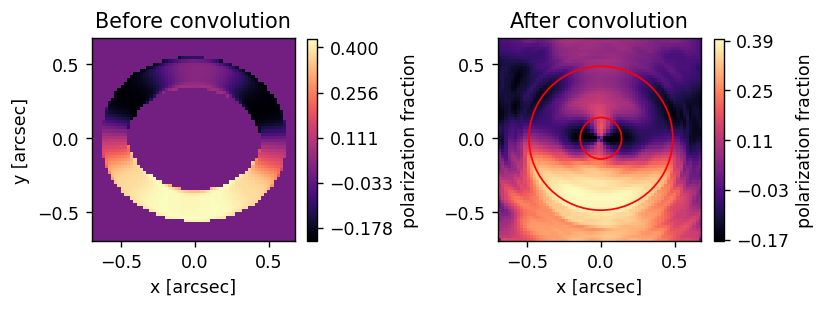

In [20]:
fig = plt.figure(dpi=125)
ax1=fig.add_subplot(121)
im1=ax1.imshow(p_1.astype(np.float64)[nx:ny,nx:ny],cmap='magma',extent=[np.min(xpix),np.max(xpix),np.max(ypix),np.min(ypix)])
ax1.invert_yaxis()
ax1.set_ylabel('y [arcsec]')
ax1.set_xlabel('x [arcsec]')
ax1.set_title('Before convolution')
ticks = np.linspace(round(p_1.astype(np.float64).min(),1), round(p_1.astype(np.float64).max(),1), 10, endpoint=True)
cb = fig.colorbar(im1,orientation='vertical',ticks=ticks,shrink=0.4)
cb.set_label("polarization fraction")
ax1.grid(False)

circ1=Circle((0, 0), 140.52996/1000, color='r', fill=False)
circ2=Circle((0, 0), 486.83592/1000, color='r', fill=False)

ax1=fig.add_subplot(122)
im1=ax1.imshow(p_2.astype(np.float64),cmap='magma',extent=[np.min(xpix),np.max(xpix),np.max(ypix),np.min(ypix)])
ax1.invert_yaxis()
ax1.add_patch(circ1)
ax1.add_patch(circ2)
#ax1.set_ylabel('y [arcsec]')
ax1.set_xlabel('x [arcsec]')
ax1.set_title('After convolution')
ticks = np.linspace(round(p_2.astype(np.float64).min(),2),round(p_2.astype(np.float64).max(),2), 5, endpoint=True)
cb = fig.colorbar(im1,orientation='vertical',ticks=ticks,shrink=0.4)
cb.set_label("polarization fraction")
ax1.grid(False)
fig.subplots_adjust(hspace=0.65, wspace=0.60, top=0.95, right=0.95)
fig.savefig(figure_dir+'pol_difference_conv_epseri.pdf', format='pdf', bbox_inches='tight')